## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the data
# df = pd.read_csv('data.csv')
X = pd.read_csv('../../../data/traininginputs.csv')
y = pd.read_csv('../../../data/trainingoutput.csv')
data = X.merge(y, on='PROC_TRACEINFO')

In [3]:
# Summary statistics
print(f"Data Shape: {data.shape}")
print(f"Data Headers: {data.columns}")
print(f"Data Index: {data.index}")

Data Shape: (34515, 15)
Data Headers: Index(['PROC_TRACEINFO', 'OP070_V_1_angle_value',
       'OP090_SnapRingPeakForce_value', 'OP070_V_2_angle_value',
       'OP120_Rodage_I_mesure_value', 'OP090_SnapRingFinalStroke_value',
       'OP110_Vissage_M8_torque_value', 'OP100_Capuchon_insertion_mesure',
       'OP120_Rodage_U_mesure_value', 'OP070_V_1_torque_value',
       'OP090_StartLinePeakForce_value', 'OP110_Vissage_M8_angle_value',
       'OP090_SnapRingMidPointForce_val', 'OP070_V_2_torque_value',
       'Binar OP130_Resultat_Global_v'],
      dtype='object')
Data Index: Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            34505, 34506, 34507, 34508, 34509, 34510, 34511, 34512, 34513,
            34514],
           dtype='int64', length=34515)


In [4]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10,6))
sns.histplot(data, x='Binar OP130_Resultat_Global_v', hue='category')
plt.title("Distribution of Target Variable")
plt.show()

ValueError: Could not interpret value `category` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

C:\Users\Owner\AppData\Local\Temp\ipykernel_28264\4041595777.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


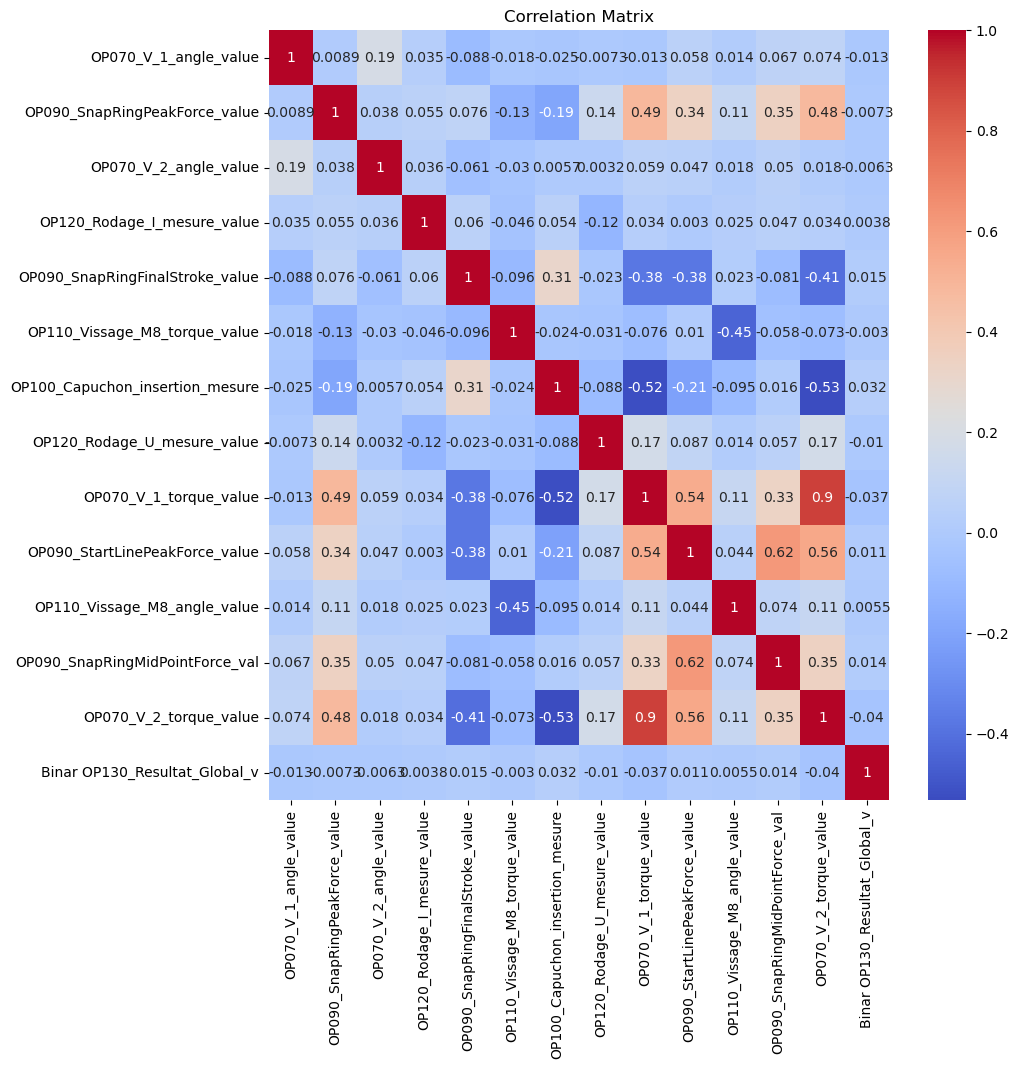

In [5]:
# Visualize the correlation between predictor variables
correlation_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [6]:
# Visualize the distribution of each predictor variable
plt.figure(figsize=(10,6))
sns.histplot(data, x='OP070_V_1_angle_value', hue='category')
plt.title("Distribution of Predictor Variables")
plt.show()

ValueError: Could not interpret value `category` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

In [7]:
# Check for missing values
print(data.isnull().sum())

PROC_TRACEINFO                         0
OP070_V_1_angle_value                  0
OP090_SnapRingPeakForce_value          0
OP070_V_2_angle_value                  0
OP120_Rodage_I_mesure_value            0
OP090_SnapRingFinalStroke_value        0
OP110_Vissage_M8_torque_value          0
OP100_Capuchon_insertion_mesure    18627
OP120_Rodage_U_mesure_value            0
OP070_V_1_torque_value                 0
OP090_StartLinePeakForce_value         0
OP110_Vissage_M8_angle_value           0
OP090_SnapRingMidPointForce_val        0
OP070_V_2_torque_value                 0
Binar OP130_Resultat_Global_v          0
dtype: int64


In [8]:
# Scale the data using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

ValueError: could not convert string to float: 'I-B-XA1207672-190429-00688'

In [9]:
# Scale the data using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop(columns='PROC_TRACEINFO'))

In [10]:
# Calculate the mean squared error and r-squared value
y_pred = scaled_data[['Binar OP130_Resultat_Global_v']]
y_true = data['Binar OP130_Resultat_Global_v']
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Value: {r2}")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Data Preparation

In [ ]:
# from sklearn.preprocessing import Imputer, MinMaxScaler
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.feature_selection import SelectKBest
# from sklearn.linear_model import LinearRegression

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (c:\Users\Owner\anaconda3\envs\genai\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [11]:
# Fix previous step so subsequent steps can run
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression

In [12]:
# Summary statistics
print(f"Data Shape: {data.shape}")
print(f"Data Headers: {data.columns}")
print(f"Data Index: {data.index}")

Data Shape: (34515, 15)
Data Headers: Index(['PROC_TRACEINFO', 'OP070_V_1_angle_value',
       'OP090_SnapRingPeakForce_value', 'OP070_V_2_angle_value',
       'OP120_Rodage_I_mesure_value', 'OP090_SnapRingFinalStroke_value',
       'OP110_Vissage_M8_torque_value', 'OP100_Capuchon_insertion_mesure',
       'OP120_Rodage_U_mesure_value', 'OP070_V_1_torque_value',
       'OP090_StartLinePeakForce_value', 'OP110_Vissage_M8_angle_value',
       'OP090_SnapRingMidPointForce_val', 'OP070_V_2_torque_value',
       'Binar OP130_Resultat_Global_v'],
      dtype='object')
Data Index: Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            34505, 34506, 34507, 34508, 34509, 34510, 34511, 34512, 34513,
            34514],
           dtype='int64', length=34515)


In [13]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10,6))
sns.histplot(data, x='Binar OP130_Resultat_Global_v', hue='category')
plt.title("Distribution of Target Variable")
plt.show()

ValueError: Could not interpret value `category` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

C:\Users\Owner\AppData\Local\Temp\ipykernel_28264\4041595777.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


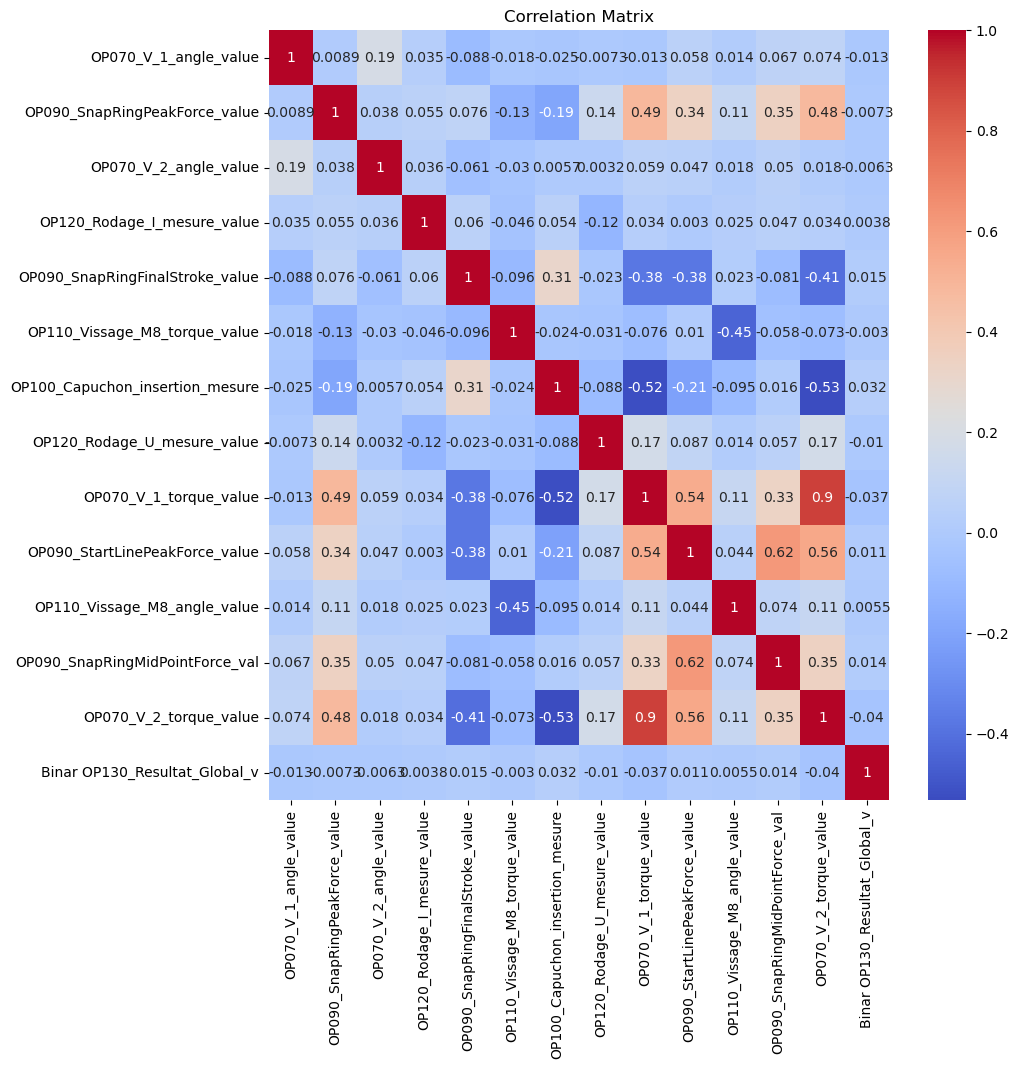

In [14]:
# Visualize the correlation between predictor variables
correlation_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [15]:
# Check for missing values
print(data.isnull().sum())

PROC_TRACEINFO                         0
OP070_V_1_angle_value                  0
OP090_SnapRingPeakForce_value          0
OP070_V_2_angle_value                  0
OP120_Rodage_I_mesure_value            0
OP090_SnapRingFinalStroke_value        0
OP110_Vissage_M8_torque_value          0
OP100_Capuchon_insertion_mesure    18627
OP120_Rodage_U_mesure_value            0
OP070_V_1_torque_value                 0
OP090_StartLinePeakForce_value         0
OP110_Vissage_M8_angle_value           0
OP090_SnapRingMidPointForce_val        0
OP070_V_2_torque_value                 0
Binar OP130_Resultat_Global_v          0
dtype: int64


In [16]:
# # Implement imputation for missing values in 'OP100_Capuchon_insertion_mesure' feature
# imputer = Imputer(missing_values='mean', strategy='mean')
# data['OP100_Capuchon_insertion_mesure'] = imputer.fit_transform(data['OP100_Capuchon_insertion_mesure'])

In [17]:
# This step was fixed in order to run subsequent steps
# Implement imputation for missing values in 'OP100_Capuchon_insertion_mesure' feature
imputer = SimpleImputer( strategy='mean')
data['OP100_Capuchon_insertion_mesure'] = imputer.fit_transform(data['OP100_Capuchon_insertion_mesure'].values.reshape(-1,1))

In [18]:
# # Scale the data using Min-Max Scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(data)

In [19]:
# This step was fixed in order to run subsequent steps
# Scale the data using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
predictor_variables = [col for col in data.columns[1:-1].tolist()]
scaler = MinMaxScaler()
data[predictor_variables] = scaler.fit_transform(data[predictor_variables])

In [20]:
# Select the top 5 features based on mutual information with the target variable
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=5)
selected_features = selector.fit_transform(scaled_data)

TypeError: _BaseFilter.fit() missing 1 required positional argument: 'y'

In [21]:
# This step was fixed in order to run subsequent steps
# Select the top 5 features based on mutual information with the target variable
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=5)
selected_features = selector.fit_transform(data[predictor_variables], data[data.columns[-1]]) # changed scaled_data to data since there is no variable called scaled_data

In [22]:
# Perform linear regression on the scaled and selected data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(selected_features, scaled_data['Binar OP130_Resultat_Global_v'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Calculate mean squared error and r-squared value
y_pred = regressor.predict(selected_features)
mse = mean_squared_error(scaled_data['Binar OP130_Resultat_Global_v'], y_pred)
r2 = r2_score(scaled_data['Binar OP130_Resultat_Global_v'], y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Value: {r2}")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Modelling

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score, roc_auc 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.stacking import StackingClassifier

ImportError: cannot import name 'roc_auc' from 'sklearn.metrics' (c:\Users\Owner\anaconda3\envs\genai\Lib\site-packages\sklearn\metrics\__init__.py)

In [25]:
# # Load the data
# data = pd.read_csv('data.csv')

In [26]:
# Split the data into train and test sets
X = data.drop(['PROC_TRACEINFO', 'Binar OP130_Resultat_Global_v'], axis=1) # included 'PROC_TRACEINFO' in the columns to drop because of its irrelevance in modelling
y = data['Binar OP130_Resultat_Global_v'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Scale the data using StandardScaler
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

In [28]:
# Fixed the error by including the import.
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train five models based on different algorithms